<a href="https://colab.research.google.com/github/M356953/ICTAK_AI_ML/blob/Assessment-2/MANAPPURAM_ASSESSMENT2_LIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



read the data

In [69]:
#reading  data from the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Display the first 5 rows of the dataset.

In [109]:
filepath ='/content/drive/MyDrive/Colab Notebooks/adult.csv'
ds_adult = pd.read_csv(filepath)
ds_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


summary of the DataFrame


In [79]:
ds_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


descriptive statistics for numeric columns

In [82]:
ds_adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Display the column names of the DataFrame.

In [83]:
ds_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

unique values in the 'workclass' column.

In [84]:
ds_adult.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Create a new column 'income_binary' where <=50K is 0 and >50K is 1.

In [85]:
ds_adult['income_binary'] = ds_adult['income'].apply(lambda x: 0 if x == '<=50K' else 1)
display(ds_adult.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


Create a new column 'age_group' categorizing ages into 'Youth' (< 30), 'Adult' (30-60), and 'Senior' (60+).

In [86]:
conditions = [
    ds_adult['age'] < 30,
    (ds_adult['age'] >= 30) & (ds_adult['age'] <= 60),
    ds_adult['age'] > 60
]
choices = ['Youth', 'Adult', 'Senior']
ds_adult['age_group'] = np.select(conditions, choices, default='Unknown')
display(ds_adult.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


Rename the 'educational-num' column to 'education_num'.

In [87]:
ds_adult.rename(columns={'educational-num': 'education_num'}, inplace=True)
display(ds_adult.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


Replace the missing values represented by '?' in 'workclass' and 'occupation' columns with 'Unknown'.

In [88]:
ds_adult['workclass'] = ds_adult['workclass'].replace('?', 'Unknown')
ds_adult['occupation'] = ds_adult['occupation'].replace('?', 'Unknown')
display(ds_adult.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,Youth
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,0,Youth


Calculate the average age for each workclass.

In [89]:
average_age_by_workclass = ds_adult.groupby('workclass')['age'].mean()
display(average_age_by_workclass)

,age
workclass,
Federal-gov,42.577514
Local-gov,41.676020
Never-worked,19.900000
Private,36.903144
Self-emp-inc,45.799410
Self-emp-not-inc,45.332470
State-gov,39.512367
Unknown,40.141122
Without-pay,47.285714


Find the total capital-gain for each gender.

In [90]:
total_capital_gain_by_gender = ds_adult.groupby('gender')['capital-gain'].sum()
display(total_capital_gain_by_gender)

,capital-gain
gender,
Female,9403120
Male,43300701


Get the count of each marital-status category.

In [91]:
marital_status_counts = ds_adult['marital-status'].value_counts()
display(marital_status_counts)

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


Find the mean hours-per-week worked by individuals in different education levels.

In [92]:
mean_hours_per_week_by_education = ds_adult.groupby('education')['hours-per-week'].mean()
display(mean_hours_per_week_by_education)

,hours-per-week
education,
10th,36.986321
11th,33.952539
12th,35.374429
1st-4th,38.761134
5th-6th,38.923379
7th-8th,39.003141
9th,38.359788
Assoc-acdm,40.809494
Assoc-voc,41.658418


Calculate the mean, median, and standard deviation of 'fnlwgt' for each race.

In [94]:
fnlwgt_stats_by_race = ds_adult.groupby('race')['fnlwgt'].agg(['mean', 'median', 'std'])
display(fnlwgt_stats_by_race)

,mean,median,std
race,,,
Amer-Indian-Eskimo,120110.985106,101579.0,94655.908850
Asian-Pac-Islander,159796.946675,139850.0,86997.647681
Black,230485.070438,208266.0,125445.929357
Other,195715.689655,188066.5,94063.712981
White,186894.995738,177287.0,102637.466726


Get the unique values and their counts for the 'native-country' column

In [95]:
native_country_counts = ds_adult['native-country'].value_counts()
display(native_country_counts)

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


Filter the dataset to include only individuals with income >50K.

In [96]:
df_income_greater_50K = ds_adult[ds_adult['income'] == '>50K']
display(df_income_greater_50K.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,Senior
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,1,Senior
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult


Sort the dataset by age in descending order.

In [97]:
adult_data_sorted_by_age = ds_adult.sort_values(by='age', ascending=False)
display(adult_data_sorted_by_age.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
18584,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,0,Senior
47977,90,Unknown,313986,HS-grad,9,Married-civ-spouse,Unknown,Husband,White,Male,0,0,40,United-States,>50K,1,Senior
7419,90,Self-emp-not-inc,122348,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,45,United-States,>50K,1,Senior
10735,90,Local-gov,188242,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,11678,0,40,United-States,>50K,1,Senior
35770,90,Private,84553,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0,Senior


Filter the dataset to include only individuals who work more than 40 hours per week.



In [98]:
df_churn_over_40_hours = ds_adult[ds_adult['hours-per-week'] > 40]
display(df_churn_over_40_hours.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,Adult
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,1,Adult
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K,1,Adult
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K,1,Adult


Calculate the percentage of missing values in each column.

In [99]:
missing_values_percentage = ds_adult.isnull().sum() / len(ds_adult) * 100
display(missing_values_percentage[missing_values_percentage > 0])

,0


Calculate the median income by education level and gender.

In [100]:
median_income_by_education_gender = ds_adult.groupby(['education', 'gender'])['income_binary'].median()
display(median_income_by_education_gender)

education     gender
10th          Female    0.0
              Male      0.0
11th          Female    0.0
              Male      0.0
12th          Female    0.0
              Male      0.0
1st-4th       Female    0.0
              Male      0.0
5th-6th       Female    0.0
              Male      0.0
7th-8th       Female    0.0
              Male      0.0
9th           Female    0.0
              Male      0.0
Assoc-acdm    Female    0.0
              Male      0.0
Assoc-voc     Female    0.0
              Male      0.0
Bachelors     Female    0.0
              Male      1.0
Doctorate     Female    1.0
              Male      1.0
HS-grad       Female    0.0
              Male      0.0
Masters       Female    0.0
              Male      1.0
Preschool     Female    0.0
              Male      0.0
Prof-school   Female    0.0
              Male      1.0
Some-college  Female    0.0
              Male      0.0
Name: income_binary, dtype: float64

Find the top 3 occupations with the highest average capital-gain.

In [101]:
top_3_occupations_capital_gain = ds_adult.groupby('occupation')['capital-gain'].mean().nlargest(3)
display(top_3_occupations_capital_gain)

,capital-gain
occupation,
Prof-specialty,2745.918017
Exec-managerial,2277.755504
Sales,1266.898256


Filter the dataset to include individuals who are 'Married-civ-spouse' and have an income >50K.

In [102]:
married_high_income = ds_adult[(ds_adult['marital-status'] == 'Married-civ-spouse') & (ds_adult['income'] == '>50K')]
display(married_high_income.head())

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary,age_group
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,Youth
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,Adult
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,Senior
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,1,Senior
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,1,Adult


Create 5 different charts and write your observations from the chart as comment

/tmp/ipython-input-3935830706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education_num', data=ds_adult, palette='coolwarm')


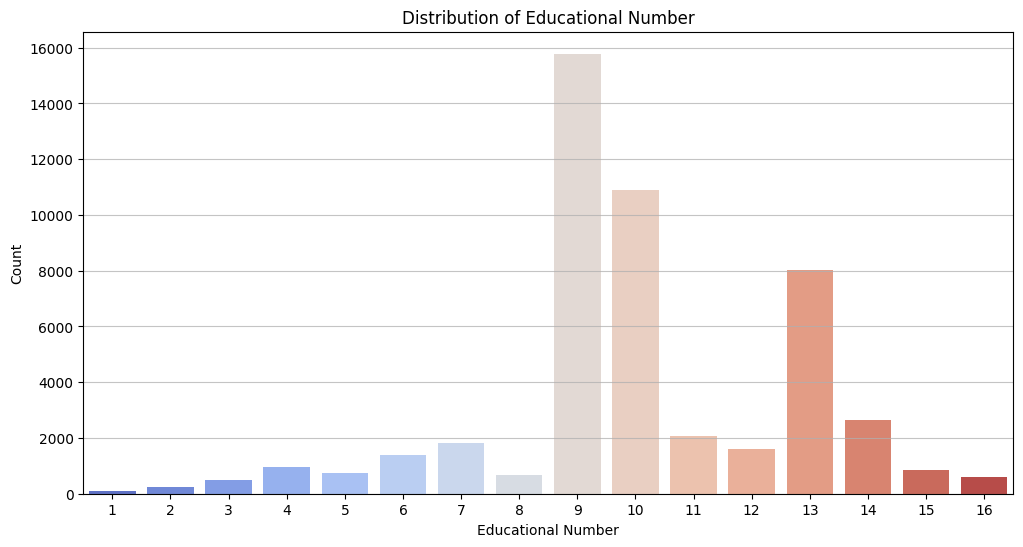

In [104]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education_num', data=ds_adult, palette='coolwarm')
plt.title('Distribution of Educational Number')
plt.xlabel('Educational Number')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Observations from the plot:
# - The most common educational number is 9, corresponding to 'HS-grad'.
# - Educational numbers 10 ('Some-college') and 13 ('Bachelors') also have high counts.
# - There's a clear decrease in counts as the educational number increases beyond the common levels, suggesting fewer individuals achieve very high education levels.
# - Very low educational numbers (e.g., 1, 2) also have very low counts.
